In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [107]:
df=pd.read_csv('nifty_data.csv')
precision=6

In [47]:
# df.drop(['Date','Open','High','Low','Shares Traded','Turnover (Rs. Cr)'], axis = 1)

In [122]:
dates=df['Date'].to_numpy()
sequence=df['Close'].to_numpy()

In [118]:
def naive_trend(sequence):
    forecast=np.zeros(sequence.size)
    forecast[0]=np.nan
    for i in range(1,sequence.size):
        forecast[i]=sequence[i-1]
    return forecast
def average_of_past(sequence):
    forecast=np.zeros(sequence.size)
    forecast[0]=np.nan
    for i in range(1,sequence.size):
        forecast[i]=sequence[:i].mean()
    return forecast
def moving_average(sequence,len=5):
    forecast=np.zeros(sequence.size)
    forecast[:len]=np.nan
    for i in range(len,sequence.size):
        forecast[i]=sequence[i-len:i].mean()
    return forecast
def exponential_smoothing(sequence,alpha=0.2):
    forecast=np.zeros(sequence.size)
    forecast[0]=np.nan
    forecast[1]=sequence[0]
    for i in range(2,sequence.size):
        forecast[i]=alpha*sequence[i-1]+(1-alpha)*forecast[i-1]
    return forecast
def holt_smoothing(sequence,alpha=0.2,beta=0.2):
    forecast=np.zeros(sequence.size)
    level=np.zeros(sequence.size)
    growth=np.zeros(sequence.size)
    level[0]=sequence[0]
    growth[0]=sequence[1]-sequence[0]
    forecast[0]=np.nan
    
    for i in range(1,sequence.size):
        level[i]=alpha*sequence[i]+(1-alpha)*(level[i-1]+growth[i-1])
        growth[i]=beta*(level[i]-level[i-1])+(1-beta)*growth[i-1]
        forecast[i]=level[i-1]+growth[i-1]
    return forecast

In [144]:
### EVALUATION METRICS ###
def eval_MAE(sequence,forecast):
    total=0.0
    count=0
    for i in range(sequence.size):
        if(np.isnan(sequence[i]) or np.isnan(forecast[i])):
            continue
        total+=abs(sequence[i]-forecast[i])
        count+=1
    avg=total/count
    return avg
def eval_MSE(sequence,forecast):
    total=0.0
    count=0
    for i in range(sequence.size):
        if(np.isnan(sequence[i]) or np.isnan(forecast[i])):
            continue
        total+=(sequence[i]-forecast[i])**2
        count+=1
    avg=total/count
    return avg
def eval_MAPE(sequence,forecast):
    total=0.0
    count=0
    for i in range(sequence.size):
        if(np.isnan(sequence[i]) or np.isnan(forecast[i])):
            continue
        total+=(sequence[i]-forecast[i])/(sequence[i])
        count+=1
    avg=total/count
    return avg

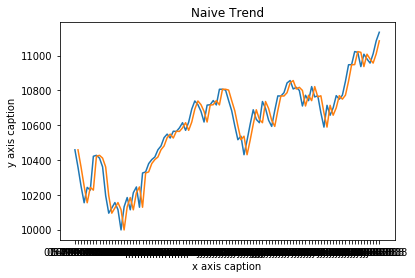

MAE : 56.637879
MSE : 4883.539975
MAPE : 9.5e-05


In [145]:
trend=naive_trend(sequence)
plt.title("Naive Trend") 
plt.xlabel("x axis caption")
plt.ylabel("y axis caption")
k=100
plt.plot(dates[:k],sequence[:k],label='Sequence')
plt.plot(dates[:k],trend[:k],label='Trend')
plt.show()

MAE=eval_MAE(sequence[:k],trend[:k])
MSE=eval_MSE(sequence[:k],trend[:k])
MAPE=eval_MAPE(sequence,trend)
print('MAE : {}'.format(round(MAE,precision)))
print('MSE : {}'.format(round(MSE,precision)))
print('MAPE : {}'.format(round(MAPE,precision)))

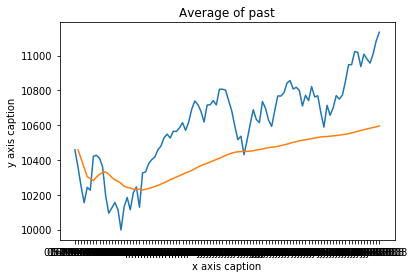

MAE : 233.53763
MSE : 68203.089802
MAPE : 0.013268


In [146]:
trend=average_of_past(sequence)
plt.title('Average of past') 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption")
k=100
plt.plot(dates[:k],sequence[:k],label='Sequence')
plt.plot(dates[:k],trend[:k],label='Trend')
plt.show()

MAE=eval_MAE(sequence[:k],trend[:k])
MSE=eval_MSE(sequence[:k],trend[:k])
MAPE=eval_MAPE(sequence,trend)
print('MAE : {}'.format(round(MAE,precision)))
print('MSE : {}'.format(round(MSE,precision)))
print('MAPE : {}'.format(round(MAPE,precision)))

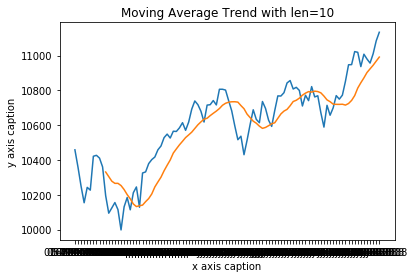

MAE : 105.975056
MSE : 15441.37505
MAPE : 0.000815


In [147]:
len=10
trend=moving_average(sequence,len)
plt.title("Moving Average Trend with len={}".format(len)) 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption")
k=100
plt.plot(dates[:k],sequence[:k],label='Sequence')
plt.plot(dates[:k],trend[:k],label='Trend')
plt.show()

MAE=eval_MAE(sequence[:k],trend[:k])
MSE=eval_MSE(sequence[:k],trend[:k])
MAPE=eval_MAPE(sequence,trend)
print('MAE : {}'.format(round(MAE,precision)))
print('MSE : {}'.format(round(MSE,precision)))
print('MAPE : {}'.format(round(MAPE,precision)))

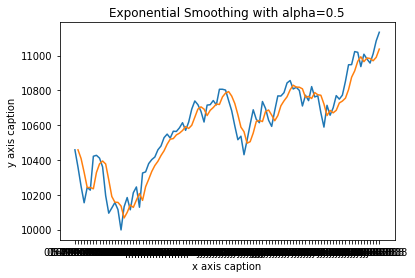

MAE : 65.467112
MSE : 6381.983029
MAPE : 0.000199


In [148]:
alpha=0.5
trend=exponential_smoothing(sequence,alpha)
plt.title("Exponential Smoothing with alpha={}".format(alpha)) 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption")
k=100
plt.plot(dates[:k],sequence[:k],label='Sequence')
plt.plot(dates[:k],trend[:k],label='Trend')
plt.show()

MAE=eval_MAE(sequence[:k],trend[:k])
MSE=eval_MSE(sequence[:k],trend[:k])
MAPE=eval_MAPE(sequence,trend)
print('MAE : {}'.format(round(MAE,precision)))
print('MSE : {}'.format(round(MSE,precision)))
print('MAPE : {}'.format(round(MAPE,precision)))

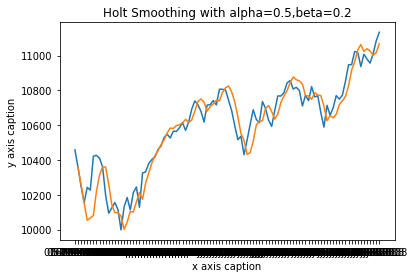

MAE : 64.359718
MSE : 7537.314751
MAPE : 0.000407


In [149]:
alpha=0.5
beta=0.2
trend=holt_smoothing(sequence,alpha)
plt.title("Holt Smoothing with alpha={},beta={}".format(alpha,beta)) 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption")
k=100
plt.plot(dates[:k],sequence[:k],label='Sequence')
plt.plot(dates[:k],trend[:k],label='Trend')
plt.show()

MAE=eval_MAE(sequence[:k],trend[:k])
MSE=eval_MSE(sequence[:k],trend[:k])
MAPE=eval_MAPE(sequence,trend)
print('MAE : {}'.format(round(MAE,precision)))
print('MSE : {}'.format(round(MSE,precision)))
print('MAPE : {}'.format(round(MAPE,precision)))